Introduction to the Creative Applications of Deep Learning course offered by Kadenze. 

Working through examples in https://github.com/pkmital/CADL/blob/master/session-0/session-0.ipynb and https://github.com/pkmital/CADL/blob/master/session-1/lecture-1.ipynb
to understand how to work with images and perform normalization.

In [182]:
import os
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [183]:
IMAGE_DIR = 'img_align_celeba'

In [184]:
# Download images from the provided celeba dataset. 
def download_celeba_files(imgdir):
    if not os.path.exists(imgdir):
        os.mkdir(imgdir)
    
    for i in range(1, 101):
        fname = '000%03d.jpg' % i
        fpath = os.path.join(imgdir, fname)
        if os.path.exists(fpath):
            continue
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + fname
        print(url)
        urllib.request.urlretrieve(url, fpath)

In [185]:
# Display the specified image.
def show_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

In [186]:
# Crops an image to square.
# Determines the longer side and makes it equal to the shorter side
# by taking away equal amounts from either end of the longer side.
def crop_to_square(img):
    # img height is greater than the width
    if img.shape[0] > img.shape[1]:
        diff = img.shape[0] - img.shape[1]
        if diff % 2 == 0:
            crop = img[diff // 2:-diff // 2, :]
        else:
            crop = img[max(0, diff // 2 + 1):min(-diff // 2, -1,), :]
    # image width is greater than height
    elif img.shape[1] > img.shape[0]:
        diff = img.shape[1] - img.shape[0]
        if diff % 2 == 0:
            crop = img[:, diff // 2:-diff // 2]
        else:
            crop = img[:, max(0, diff // 2 + 1):min(-diff // 2, -1)]
    else:
        crop = img
    return crop

In [187]:
# Crops the image, keeping the same aspect ratio.
# Takes in a param between 0 and 1 that specifies the crop percentage 
def crop_keep_aspect(img, crop_pct):
    if crop_pct <= 0 or crop_pct >= 1:
        return img
    r = int(img.shape[0] * crop_pct) // 2
    c = int(img.shape[1] * crop_pct) // 2
    return img[r:-r, c:-c]

In [188]:
# Preprocess all the images in the specified directory.
def preprocess_images(imgdir):
    imgs = []
    files = os.listdir(imgdir)
    files = [os.path.join(imgdir, f) for f in files if '.jpg' in f]
    for f in files:
        img = plt.imread(f)
        # crop to square
        sq = crop_to_square(img)
        # crop a certain percent of the image
        crop = crop_keep_aspect(sq, 0.2)
        imgs.append(crop)
    return imgs

In [189]:
# download and preprocess all images and hold the data in a numpy array
download_celeba_files(IMAGE_DIR)
imgs = preprocess_images(IMAGE_DIR)
data = np.array(imgs)
print(len(imgs))
print(imgs[0].shape)
print(data.shape)

100
(144, 144, 3)
(100, 144, 144, 3)


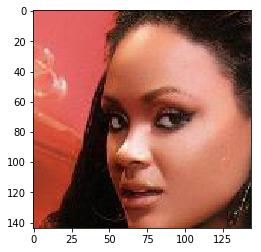

In [190]:
# display a random image in the set
i = imgs[np.random.randint(100)]
plt.imshow(i)


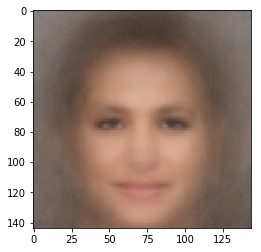

In [191]:
# mean of all the images
mean_image = np.mean(data, axis=0)
plt.imshow(mean_image.astype(np.uint8()))

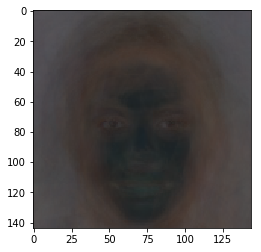

In [192]:
# std deviation of the images
std_image = np.std(data, axis=0)
plt.imshow(std_image.astype(np.uint8()))

(6220800,)


(array([85785., 38179., 40186., 29892., 28402., 27755., 27149., 26842.,
        26672., 27570., 28380., 29197., 30303., 30925., 31034., 30403.,
        31706., 32049., 32297., 32707., 31356., 31129., 30981., 30217.,
        29736., 29731., 29927., 30068., 30052., 30623., 32015., 30253.,
        30396., 30504., 30771., 30705., 31585., 31790., 32277., 32006.,
        31060., 30460., 29983., 31177., 31973., 29743., 29199., 29699.,
        28593., 29131., 28307., 28037., 27767., 26708., 26655., 26209.,
        25821., 25532., 25768., 24792., 24196., 24226., 24040., 23675.,
        23869., 23600., 23596., 23967., 24166., 24297., 24124., 23982.,
        23963., 24481., 24305., 24059., 24187., 24012., 23903., 24089.,
        24196., 24724., 24892., 24436., 24234., 24451., 24620., 24315.,
        24059., 24012., 24390., 24440., 24257., 24226., 23918., 24551.,
        24917., 24533., 24447., 24860., 24927., 24759., 24475., 24756.,
        24724., 25174., 24531., 24957., 25277., 25020., 25339., 

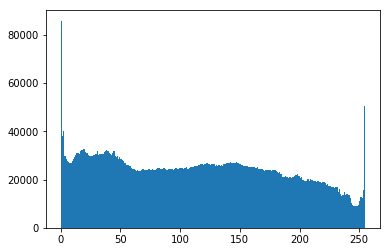

In [193]:
# flatten all the data i.e. turn the data into a single-dim array
flattened = data.ravel()
print(flattened.shape)
# Show the histogram with 255 buckets
plt.hist(flattened, 255)

(array([  2.,   0.,   0.,   0.,   2.,  18.,  30.,  23.,  42.,  42.,  43.,
         41.,  51.,  48.,  30.,  52.,  58.,  59.,  67.,  67.,  71.,  83.,
         94., 110., 110., 107., 134., 103., 109., 159., 195., 199., 192.,
        229., 253., 203., 251., 235., 225., 227., 261., 275., 278., 332.,
        362., 373., 419., 436., 476., 490., 490., 528., 547., 547., 488.,
        516., 486., 523., 512., 554., 545., 543., 534., 544., 531., 583.,
        561., 577., 597., 592., 578., 613., 591., 585., 601., 662., 593.,
        637., 717., 604., 610., 576., 597., 621., 594., 649., 553., 542.,
        597., 569., 595., 619., 558., 585., 535., 549., 537., 614., 590.,
        526., 575., 647., 598., 593., 666., 572., 556., 553., 516., 492.,
        544., 520., 507., 448., 423., 431., 418., 382., 353., 346., 324.,
        339., 304., 315., 300., 331., 293., 291., 293., 238., 229., 207.,
        214., 203., 197., 220., 226., 229., 204., 185., 197., 203., 185.,
        190., 176., 171., 215., 168., 

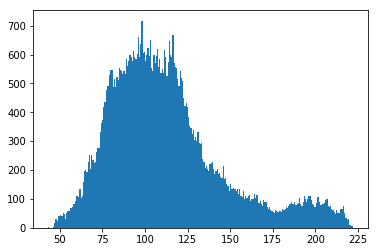

In [194]:
# histogram for the mean image
plt.hist(mean_image.ravel(), 255)

Text(0.5,1,'(img - mean) distribution')

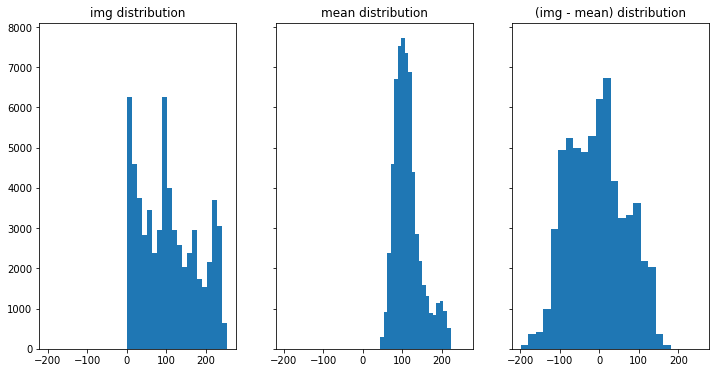

In [195]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((i).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_image).ravel(), bins)
axs[1].set_title('mean distribution')
# distance between the image and the mean distributions
axs[2].hist((i - mean_image).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

(-5, 5)

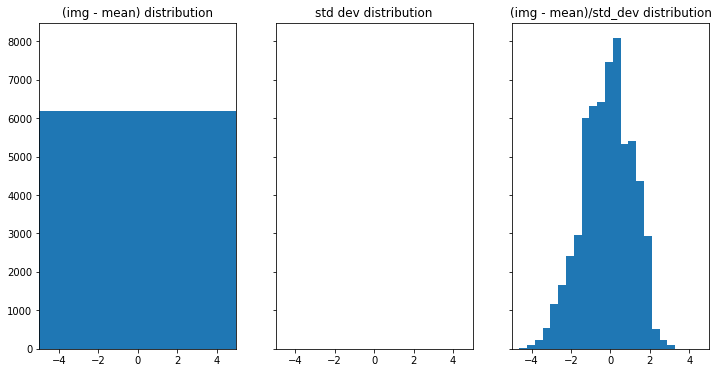

In [197]:
# Complete the normalization i.e. compute (img - mean)/stddev 
# and readjust the axes of the plot for better viewing.
# The normalized data for the image shows if it is centered around 0
# with some data on either side.
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((i - mean_image).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_image).ravel(), bins)
axs[1].set_title('std dev distribution')
axs[2].hist(((i - mean_image)/std_image).ravel(), bins)
axs[2].set_title('(img - mean)/std_dev distribution')
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])